In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import pickle
import statistics as st
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)

c:\Users\Xaris\Desktop\Project\Medical Insurance Cost\Medical-Insurance-Cost\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Xaris\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1


In [3]:
df = pd.read_csv(r"C:\Users\Xaris\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1\insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


What does the meaning of its column (and the data type of each feature) ?

age: Age of primary beneficiary (int)

sex: Gender of beneficiary (male, female)

bmi: Body Mass Index, a measure of body fat based on height and weight (float)

children: Number of children covered by health insurance (int)

smoker: Smoking status of the beneficiary (yes, no)

region: Residential region in the US (northeast, northwest, southeast, southwest)

charges: Medical insurance cost billed to the beneficiary (float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df.shape

(1338, 7)

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

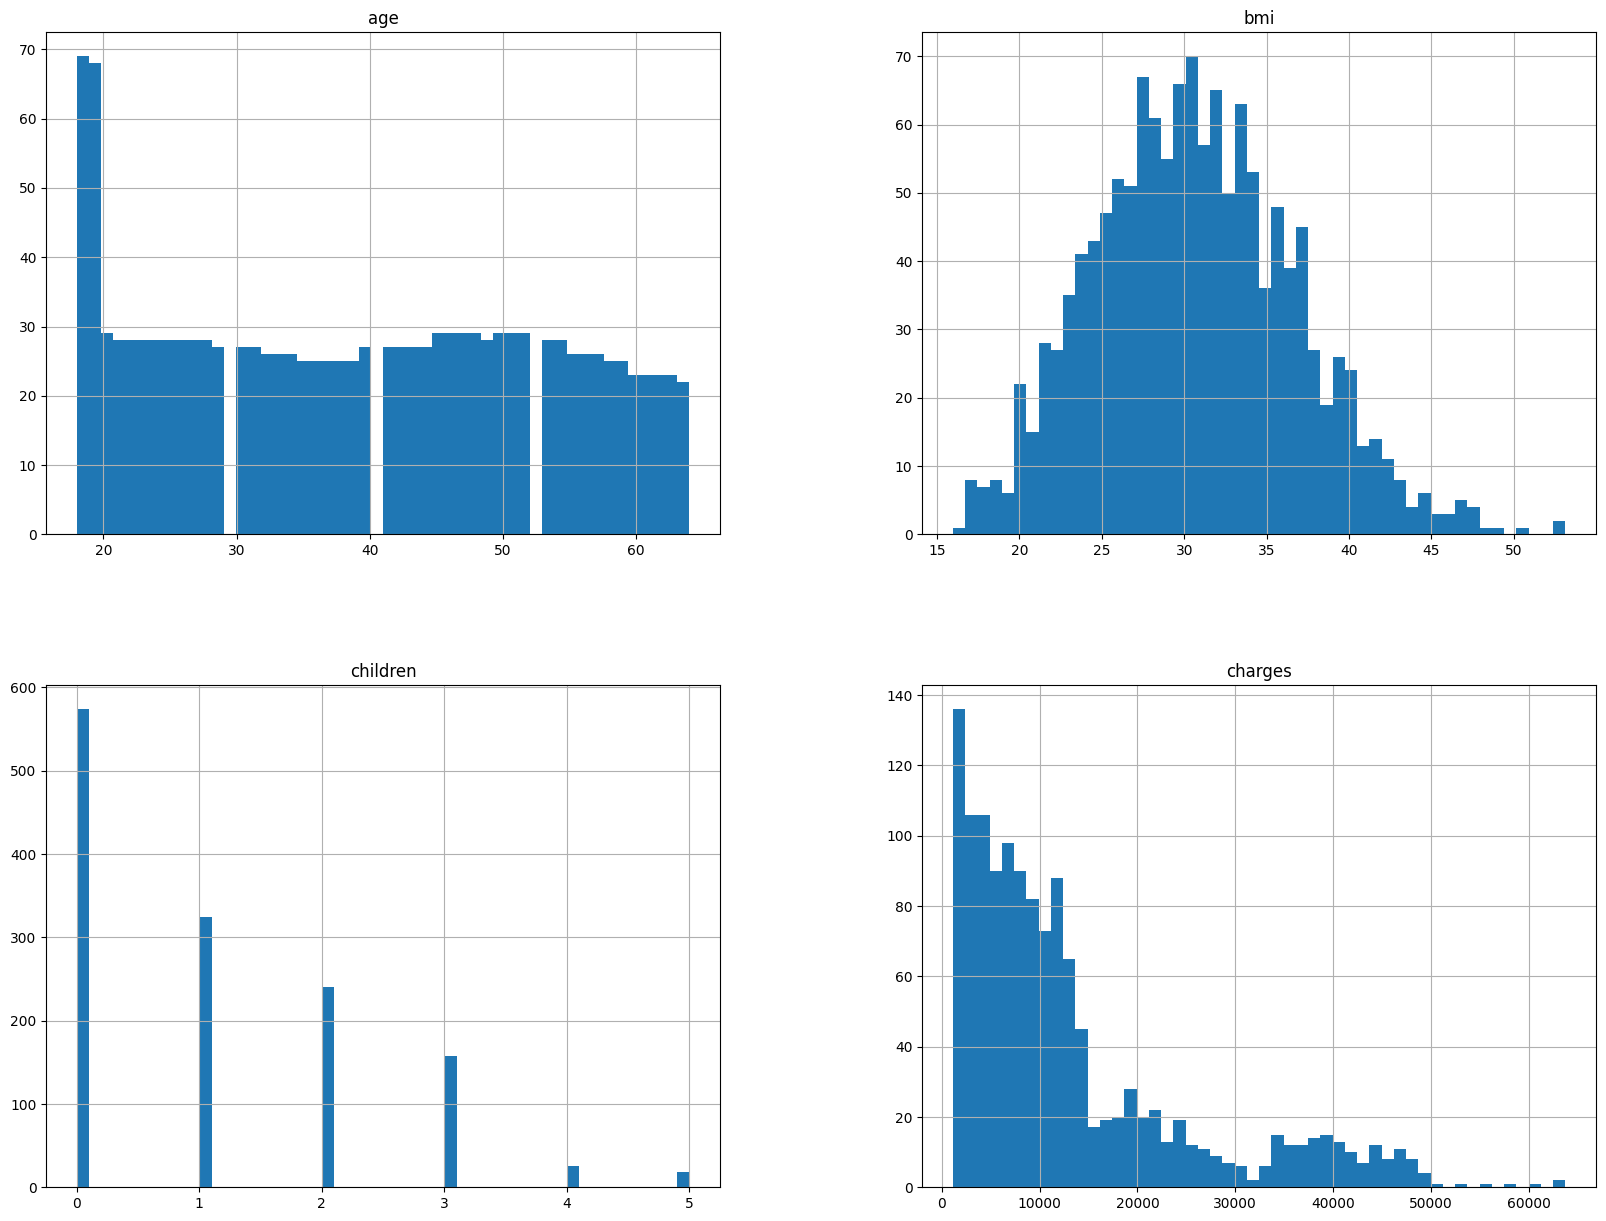

In [13]:
df.hist(bins = 50,figsize = (20,15))

As we can see from the above diagramm adults has a quite high bmi prices. <br>
The BMI Categories for Adults are:<br>
Underweight: Below 18.5<br>
Normal Weight (Healthy): 18.5 to 24.9<br>
Overweight: 25.0 to 29.9<br>
Obese: 30.0 or above

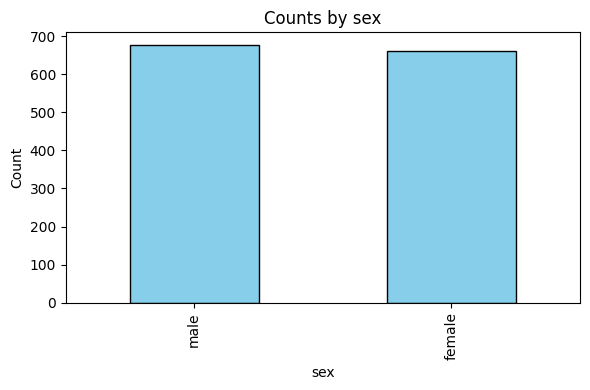

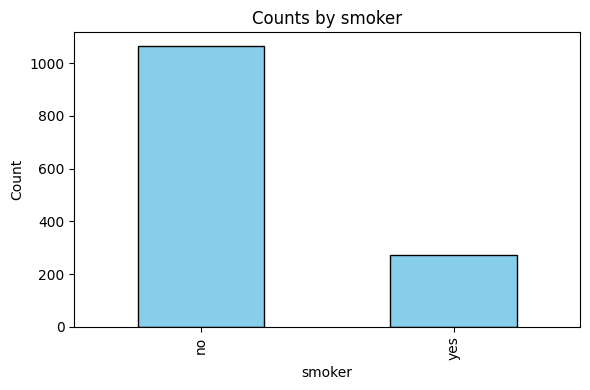

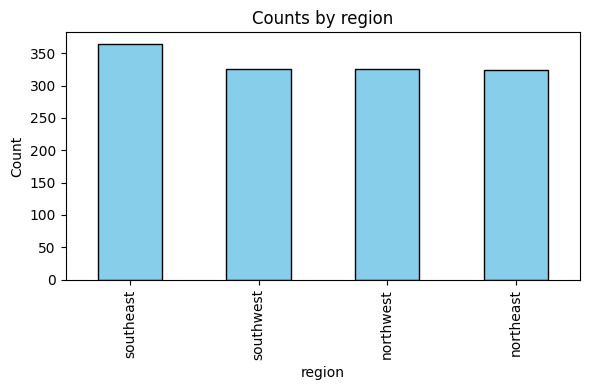

In [14]:
def plot_categorical(df:pd.DataFrame, col:str):
    counts = df[col].value_counts()
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Counts by {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

for col in ["sex", "smoker", "region"]:
    plot_categorical(df,col)

In [15]:
def boxplot_by_smoke_gr(df:pd.DataFrame,value_col: str, group_col: str):
    plt.figure(figsize=(6,4))
    groups = df.groupby(group_col)[value_col].apply(list)
    positions = range(1,len(groups) + 1)
    plt.boxplot(groups.tolist(), positions = list(positions), labels = list(groups.index))
    plt.title(f'{value_col} by {group_col}')
    plt.xlabel(group_col)
    plt.ylabel(value_col)
    plt.tight_layout()
    plt.show()

C:\Users\Xaris\AppData\Local\Temp\ipykernel_8120\1893618738.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups.tolist(), positions = list(positions), labels = list(groups.index))


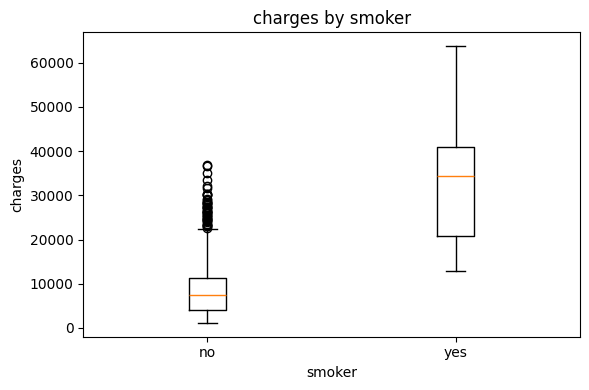

In [16]:
boxplot_by_smoke_gr(df, "charges", "smoker")

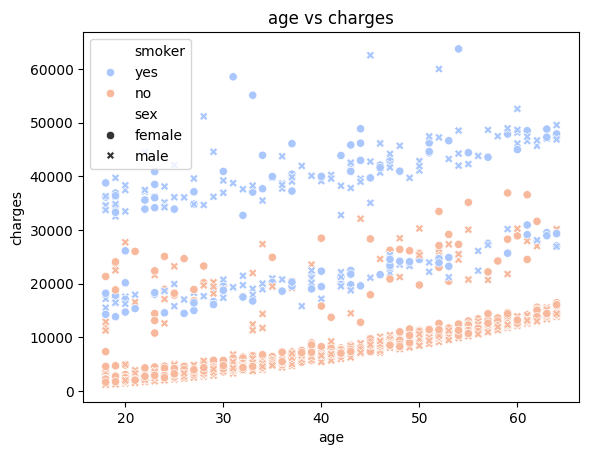

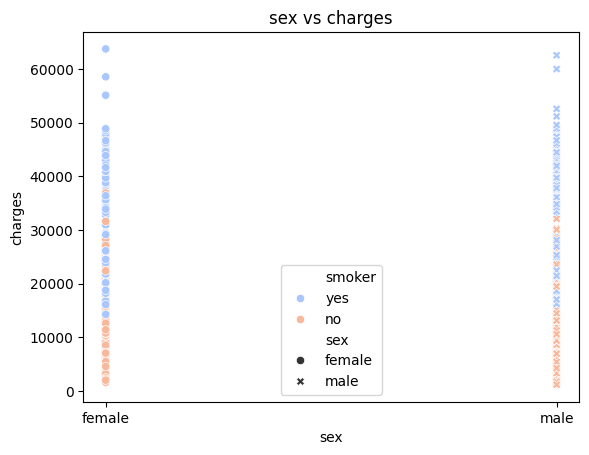

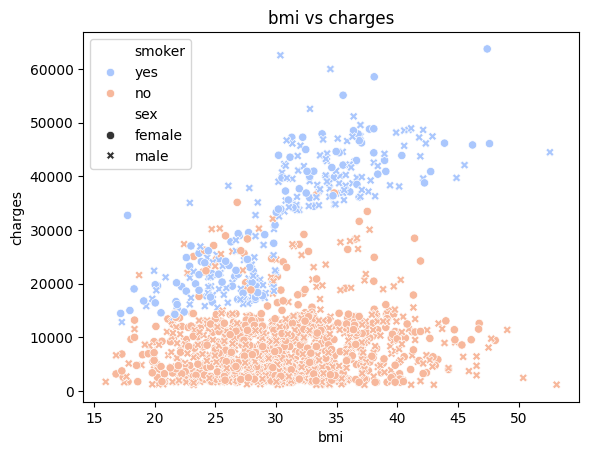

In [17]:
def charges_corr(df: pd.DataFrame, x: str, y: str):
    sns.scatterplot(x = df[x], y = df[y], hue="smoker", style="sex", data=df, palette="coolwarm")
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
    
for x in ['age', 'sex', 'bmi']:
    charges_corr(df, x, 'charges')


C:\Users\Xaris\AppData\Local\Temp\ipykernel_8120\2928319271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children',data=df, palette='Set2')
C:\Users\Xaris\AppData\Local\Temp\ipykernel_8120\2928319271.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Charges', loc='upper right')


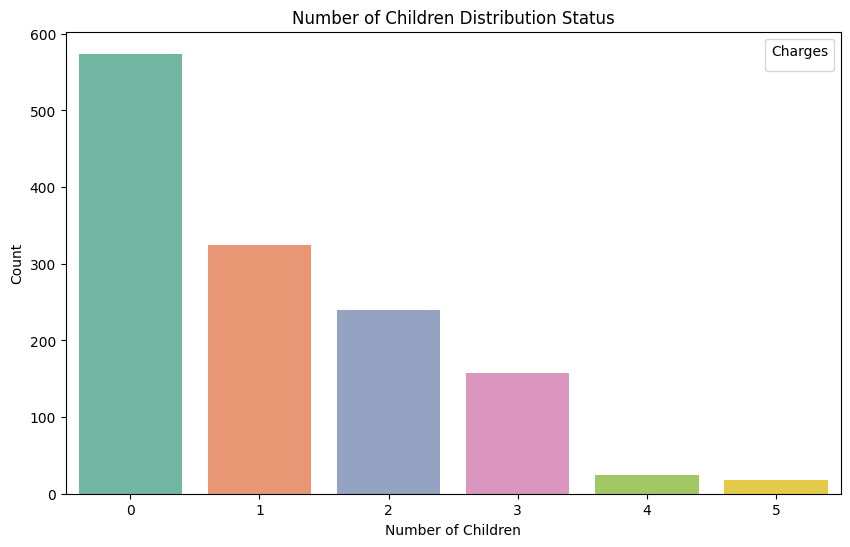

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='children',data=df, palette='Set2')
plt.title('Number of Children Distribution Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Charges', loc='upper right')

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
subdata = df[['age','bmi','children', 'charges']]
subdata.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

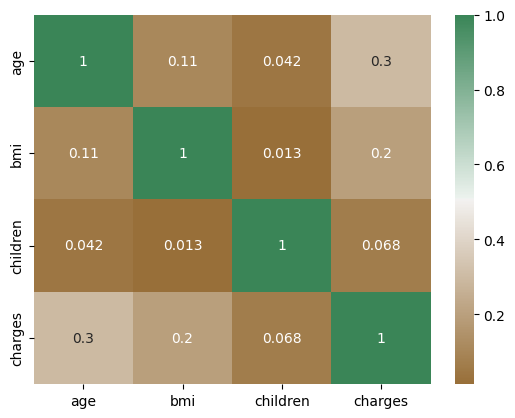

In [21]:
sns.heatmap(subdata.corr(), annot = True,cmap=sns.diverging_palette(50, 500, n=500))

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

categorical = ['sex','smoker','region']
numeric = ['age','bmi','children']

oh = OneHotEncoder()

for col in categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [23]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, : -1].copy()
y = df.iloc[:, -1].copy()

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

We will check the following models:
- LinearRegression (Lasso, Ridge)
- RandomForestRegressor
- GradientBoostingRegressor
- SVR

--------------------------------------------------
The LinearRegression metrics are:

R2 score: 0.7833
MAE: 4186.51
MSE: 33635210.43
RMSE: 5799.59


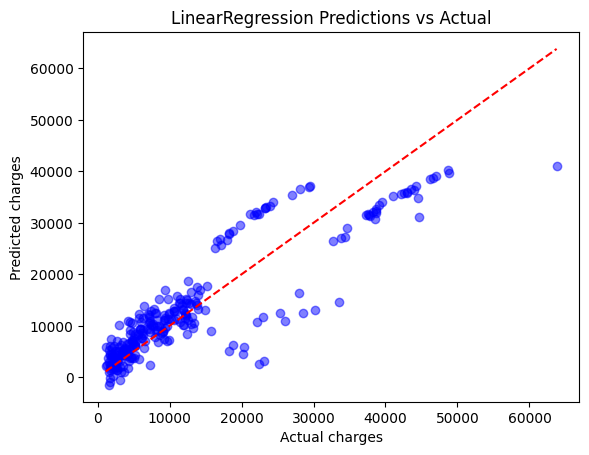

--------------------------------------------------
The Ridge metrics are:

R2 score: 0.7831
MAE: 4198.14
MSE: 33675792.15
RMSE: 5803.08


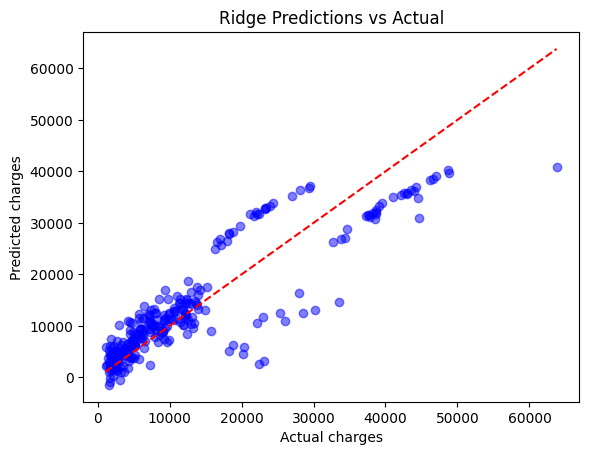

--------------------------------------------------
The Lasso metrics are:

R2 score: 0.7833
MAE: 4187.24
MSE: 33639339.31
RMSE: 5799.94


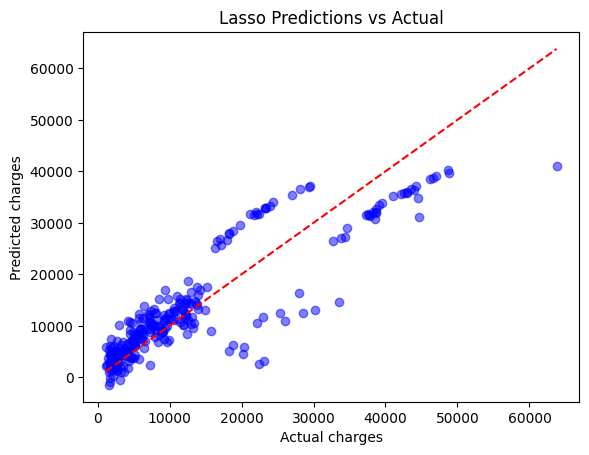

In [50]:
#Linear Regression Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
models = [LinearRegression, Ridge, Lasso]
def train_and_evaluate_model(model_class, X_train, y_train, X_test, y_test):
    if model_class != LinearRegression:
        params = {'alpha': [0.01, 0.1, 1.0]}  
        grid_search = GridSearchCV(estimator=model_class(), param_grid=params, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model_class()
        best_model.fit(X_train, y_train)
        
        
    y_pred = best_model.predict(X_test)
    R2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE , y_pred, best_model

for model_class in models:
    R2, MAE, MSE, RMSE, y_pred, fitted_model = train_and_evaluate_model(model_class, X_train, y_train, X_test, y_test)
    print("--------------------------------------------------")
    print(f'The {model_class.__name__} metrics are:\n')
    print(f'R2 score: {R2:.4f}')
    print(f'MAE: {MAE:.2f}')
    print(f'MSE: {MSE:.2f}')
    print(f'RMSE: {RMSE:.2f}')

    plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()], "r--")
    plt.xlabel("Actual charges")
    plt.ylabel("Predicted charges")
    plt.title(f"{model_class.__name__} Predictions vs Actual")
    plt.show()

--------------------------------------------------
The Decision Tree Regressor metrics are:

The Decision Tree Regressor model R2 score is: 0.7314289189100511
The Decision Tree Regressor model MAE is: 2932.325540768657
The Decision Tree Regressor model MSE is: 41695319.654588796
The Decision Tree Regressor model RMSE is: 6457.191313147598
--------------------------------------------------
The Best Decision Tree Regressor metrics (after hyperparameter tuning) are:

The Best Decision Tree Regressor model R2 score is: 0.8658566523201541
The Best Decision Tree Regressor model MAE is: 2660.062515360253
The Best Decision Tree Regressor model MSE is: 20825584.56535602
The Best Decision Tree Regressor model RMSE is: 4563.505731929787
Best Hyperparameters (for Decision Tree Regressor): {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


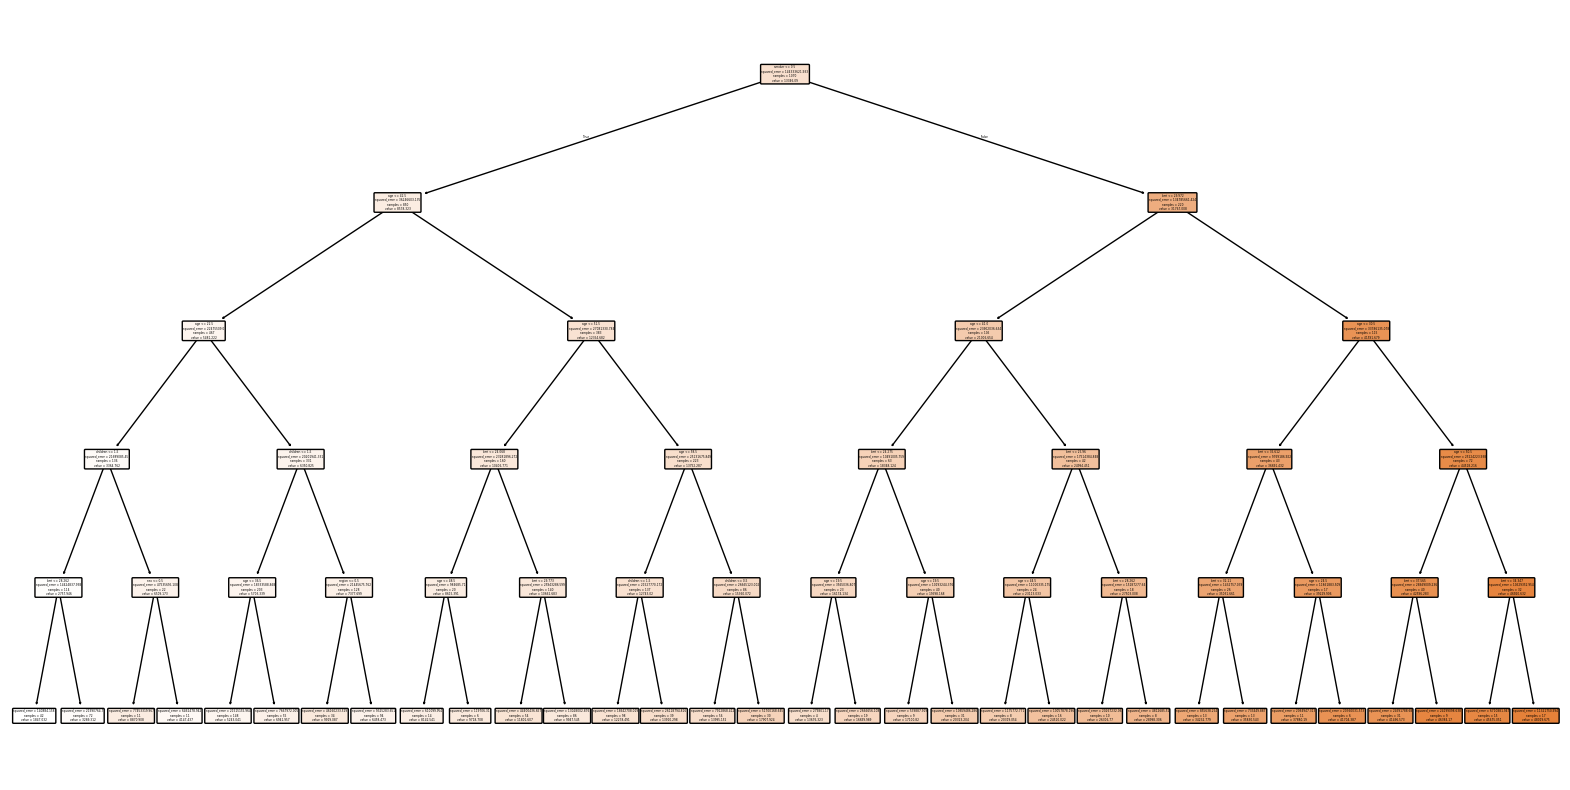

In [56]:
# Decision Tree Classifier
from matplotlib.pyplot import clf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

x = df.iloc[:, : -1].copy()
y = df.iloc[:, -1].copy()

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
rg = DecisionTreeRegressor()
rg.fit(X_train, y_train)
y_pred = rg.predict(X_test)

R2= r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("--------------------------------------------------")
print(f'The Decision Tree Regressor metrics are:\n')
print(f'The Decision Tree Regressor model R2 score is: {R2}')
print(f'The Decision Tree Regressor model MAE is: {MAE}')
print(f'The Decision Tree Regressor model MSE is: {MSE}')
print(f'The Decision Tree Regressor model RMSE is: {RMSE}')


# Hyperparameter Tuning for Decision Tree Regressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rg, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rg = grid_search.best_estimator_
y_pred = best_rg.predict(X_test)
R2= r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("--------------------------------------------------")
print(f'The Best Decision Tree Regressor metrics (after hyperparameter tuning) are:\n')
print(f'The Best Decision Tree Regressor model R2 score is: {R2}')
print(f'The Best Decision Tree Regressor model MAE is: {MAE}')
print(f'The Best Decision Tree Regressor model MSE is: {MSE}')
print(f'The Best Decision Tree Regressor model RMSE is: {RMSE}')
print("Best Hyperparameters (for Decision Tree Regressor):", grid_search.best_params_)
plt.figure(figsize=(20,10))
tree.plot_tree(best_rg, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

In [70]:
# Random Forest Regressor
from matplotlib.pyplot import clf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

x = df.iloc[:, : -1].copy()
y = df.iloc[:, -1].copy()

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42,oob_score=True)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

MAE = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {MAE}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

#Calculating out-of-bag error
oob_score = rf.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

feature_importances = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
print(f'Feature importance {feature_importances}')

Mean Squared Error: 21073365.415079337
Mean Absolute Error: 2533.674643617756
R-squared: 0.8642606273649586
Out-of-Bag Score: 0.8287045192976412
Feature importance           Importance
smoker      0.608618
bmi         0.216291
age         0.134554
children    0.020199
region      0.013926
sex         0.006412


In [76]:
# Support Vector Regression (SVR) Model
from sklearn.svm import SVR
from matplotlib.pyplot import clf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

x = df.iloc[:, : -1].copy()
y = df.iloc[:, -1].copy()

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Scale features manually
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. SVR model
svr = SVR()

# 3. Hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

# 4. Grid search
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_svr = grid_search.best_estimator_

# 5. Evaluate
y_pred = best_svr.predict(X_test_scaled)

R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("--------------------------------------------------")
print("Best SVR after hyperparameter tuning:\n")
print(f"R2 score: {R2:.4f}")
print(f"MAE: {MAE:.2f}")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print("Best Hyperparameters:", grid_search.best_params_)



--------------------------------------------------
Best SVR after hyperparameter tuning:

R2 score: 0.5056
MAE: 4193.58
MSE: 76754930.77
RMSE: 8760.99
Best Hyperparameters: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


put 
elastic net 
gradient descent 
xgboost
